# 预测代码

In [13]:
import torch
from torch.autograd import Variable
import os
import random
import linecache
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
# from train import SiameseNetwork
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
import torch.nn.functional as F
import cv2
import torch.nn as nn

###########################类定义
##必须有，虽然不用。
## 哪里load，哪里就要有模型的定义
class SiameseNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #Sequential 一个容器
        self.cnn1 = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(1, 4, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(4),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(4, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),

            nn.ReflectionPad2d(1),
            nn.Conv2d(8, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(8*100*100, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 5))

    def forward_once(self, x):
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2
    
#########################


In [14]:
transform=transforms.Compose(
        [transforms.Resize((100, 100)), transforms.ToTensor()])
 
# model = torch.load('./Linear.pth').cuda()
model = torch.load('model_all.pth').cuda()
model.eval()

SiameseNetwork(
  (cnn1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReflectionPad2d((1, 1, 1, 1))
    (9): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU(inplace=True)
    (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Sequential(
    (0): Linear(in_features=80000, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=5, bias=True)
  )
)

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.025539875030517578
2.236068e-06


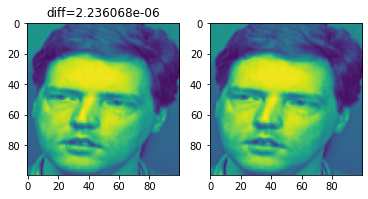

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.005001544952392578
0.37259522


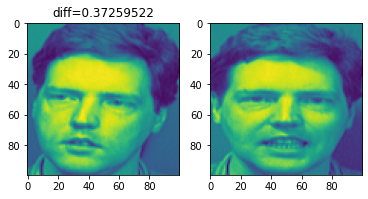

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000663757324219
1.1882267


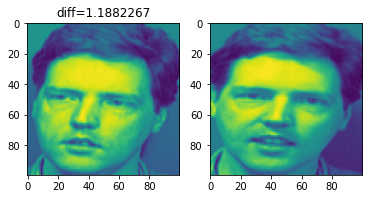

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004001140594482422
1.1230578


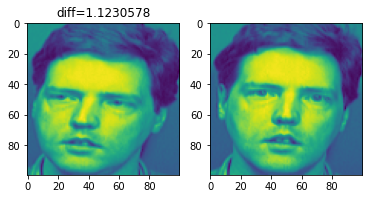

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000663757324219
0.4366254


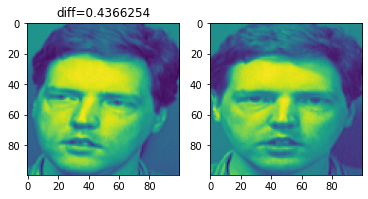

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.005002260208129883
0.3778647


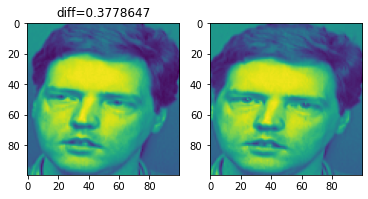

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000425338745117
2.4029968


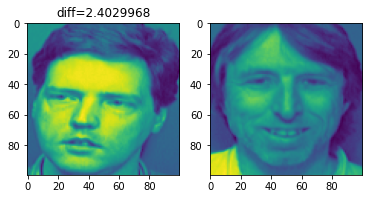

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004001617431640625
2.6343322


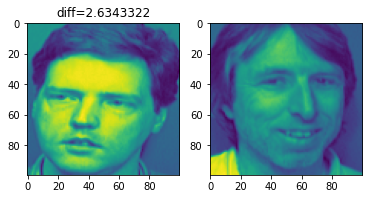

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.00500035285949707
2.0358586


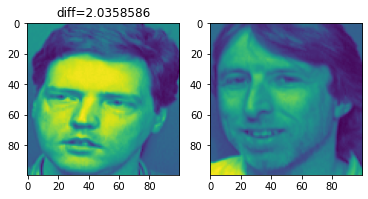

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004001140594482422
2.201483


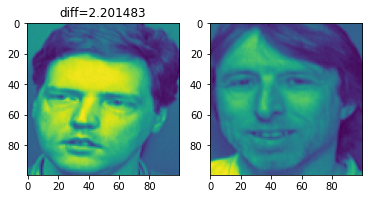

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.00400090217590332
1.8423222


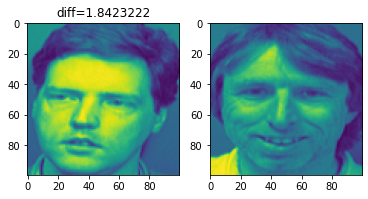

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000186920166016
2.2606416


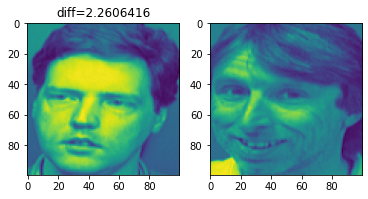

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.0040018558502197266
2.8328536


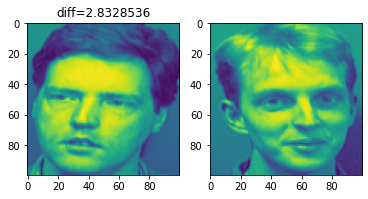

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000186920166016
2.1450315


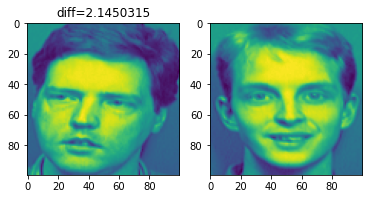

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.00400090217590332
2.3039873


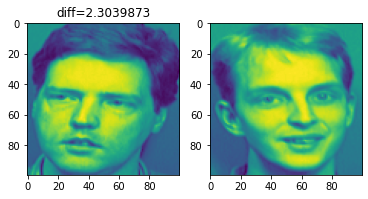

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.005001068115234375
2.529419


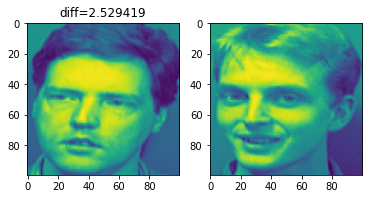

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000663757324219
2.5199199


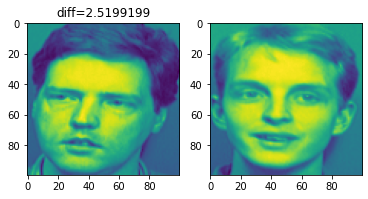

./data/faces/testing/s38/1.pgm
(100, 100)
time_used: 0.004000663757324219
2.6717541


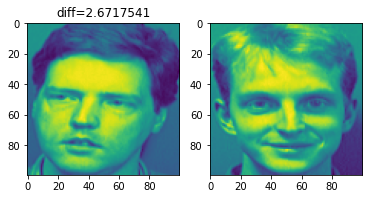

[[2.236068e-06, 0.37259522, 1.1882267, 1.1230578, 0.4366254, 0.3778647], [2.4029968, 2.6343322, 2.0358586, 2.201483, 1.8423222, 2.2606416], [2.8328536, 2.1450315, 2.3039873, 2.529419, 2.5199199, 2.6717541]]


In [42]:
# ./data/faces/testing/s40/1.pgm
import time
def img_pre(str_input1,str_input2):
    time1=time.time()
    #图片预处理
    img1 = PIL.Image.open(str_input1)
    img2 = PIL.Image.open(str_input2)
    img1 = img1.convert("L")
    img2 = img2.convert("L")

    img11 = transform(img1)
    img22 = transform(img2)

    imgs1 = np.array(img11)
    imgs1 = imgs1[0,...]
    imgs2 = np.array(img22)
    imgs2 = imgs2[0,...]
    print(imgs1.shape)
 
    input1 = img11.unsqueeze(0)
    input2 = img22.unsqueeze(0)
    
    #预测
    output1, output2 = model(Variable(input1).cuda(), Variable(input2).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    time2=time.time()
    print('time_used:',time2-time1)
    #plt.imshow
    diff = euclidean_distance.cpu().detach().numpy()[0]
    print(euclidean_distance.cpu().detach().numpy()[0])
    plt.subplot(1, 2, 1)
    plt.title('diff='+str(diff))
    plt.imshow(imgs1)
    plt.subplot(1, 2, 2)
    plt.imshow(imgs2)
    plt.show()
    return diff
    
    

    
    
base_str='./data/faces/testing/'

diff=[[],[],[]]
for j in range(3):
    person1=38
    person2=38+j
    for i in range(6):
        str_input1=base_str+'s'+str(person1)+'/'+'1'+'.pgm'
        print(str_input1)
        str_input2=base_str+'s'+str(person2)+'/'+str(i+1)+'.pgm'
        tmp_diff=img_pre(str_input1,str_input2)
        diff[j].append(tmp_diff)
        
print(diff)



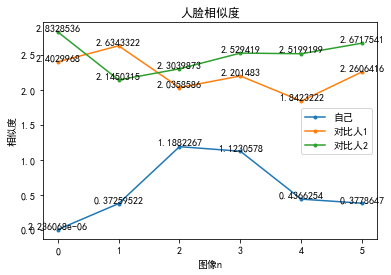

In [46]:
# 绘制对比图
import matplotlib.pyplot as plt




plt.title('人脸相似度')  # 折线图标题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('图像n')  # x轴标题
plt.ylabel('相似度')  # y轴标题

x = [0,1,2,3,4,5]
y=[[],[],[]]
for i in range(3):
    y[i]=diff[i]
    plt.plot(x, y[i], marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
    for a, b in zip(x, y[i]):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=10)  # 设置数据标签位置及大小

plt.legend(['自己', '对比人1', '对比人2'])  # 设置折线名称
plt.show()  # 显示折线图